In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('mic2.xlsx',
                   engine = 'openpyxl')
df.head(2)

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


In [ ]:
def custom_cls(x):
  if (0<= x <= 20):
    return '<=20'
  elif (21<= x <= 30):
    return '21 - 30'
  elif (31<= x <= 40):
    return '31 - 40'
  else:
    return '>=40'

In [ ]:
df['AgeGP'] = df.apply(lambda tbl: custom_cls(tbl['Age']),
                       axis=1)
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31 - 40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,21 - 30
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,>=40
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,21 - 30
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,21 - 30


In [ ]:
age_gender = df.groupby(['AgeGP', 'Sex']).size()
age_gender = age_gender.to_frame()
age_gender

0
AgeGP   Sex       
21 - 30 Female  11
        Male    20
31 - 40 Female   4
        Male     1
<=20    Female   5
        Male     6
>=40    Female   2
        Male     1

In [ ]:
age_gender = age_gender.rename(columns ={0:'Countszz'})
age_gender = age_gender.reset_index()
age_gender['%'] = (age_gender.iloc[:,-1]/(age_gender.iloc[:, -1]).sum())*100
age_gender

,AgeGP,Sex,Countszz,%
0,21 - 30,Female,11,22.0
1,21 - 30,Male,20,40.0
2,31 - 40,Female,4,8.0
3,31 - 40,Male,1,2.0
4,<=20,Female,5,10.0
5,<=20,Male,6,12.0
6,>=40,Female,2,4.0
7,>=40,Male,1,2.0


In [ ]:
import seaborn as sns

In [ ]:
polot_order = ['<=20', '21 - 30', '31 - 40', '>=40']

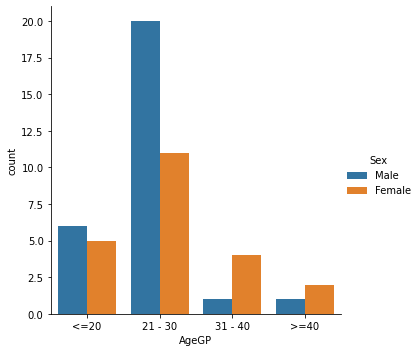

In [ ]:
g = sns.catplot(x = 'AgeGP',
                kind = 'count',
                data = df,
                hue = 'Sex',
                order = polot_order)

In [ ]:
age_gender.columns

Index(['AgeGP', 'Sex', 'Countszz', '%'], dtype='object')

In [ ]:
import plotly.express as px

In [ ]:
fig1 = px.sunburst(age_gender,
                   path = ['AgeGP', 'Sex', 'Countszz', '%'],
                  color='AgeGP',
                  title = ''
                   )
fig1.show()

In [ ]:
fig = px.sunburst(age_gender,
                   path = ['Sex', 'AgeGP', 'Countszz', '%'],
                  color='AgeGP',
                  title = ''
                   )
fig.show()

In [ ]:
pip install dash

     |████████████████████████████████| 9.6 MB 4.1 MB/s 
     |████████████████████████████████| 357 kB 35.3 MB/s 


In [ ]:
import dash

In [ ]:
from dash import html
from dash import dcc

In [ ]:
pip install jupyter_dash

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=33788561b47474f14460863a3b4f624c689c3a0951aa2469e2188e69d1eb5c39
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
from jupyter_dash import JupyterDash

In [ ]:
miDash = JupyterDash(__name__)
miDash.layout = html.Div(children = [html.H1('Title'),
                                     html.P(html.P('Description')),
                                     dcc.Graph(figure = fig),
                                     dcc.Graph(figure = fig1)
                                     ])
if __name__ == '__main__':
  miDash.run_server()

Dash app running on:


<IPython.core.display.Javascript object>